In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv('listings.csv')

In [67]:
data.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,22493,2.255200e+04,22526,22552,22552,22552.000000,22552.000000,22552,22552.000000,22552.000000,22552.000000,18644,18638.000000,22552.000000,22552.000000
unique,NaN,21873,NaN,5997,12,136,NaN,NaN,3,NaN,NaN,NaN,1312,NaN,NaN,NaN
top,NaN,Berlin Wohnung,NaN,Anna,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,NaN,NaN,Private room,NaN,NaN,NaN,2018-11-04,NaN,NaN,NaN
freq,NaN,14,NaN,216,5497,1325,NaN,NaN,11534,NaN,NaN,NaN,618,NaN,NaN,NaN
mean,1.571560e+07,NaN,5.403355e+07,NaN,NaN,NaN,52.509824,13.406107,NaN,67.143668,7.157059,17.840679,NaN,1.135525,1.918233,79.852829
std,8.552069e+06,NaN,5.816290e+07,NaN,NaN,NaN,0.030825,0.057964,NaN,220.266210,40.665073,36.769624,NaN,1.507082,3.667257,119.368162
min,2.015000e+03,NaN,2.217000e+03,NaN,NaN,NaN,52.345803,13.103557,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,8.065954e+06,NaN,9.240002e+06,NaN,NaN,NaN,52.489065,13.375411,NaN,30.000000,2.000000,1.000000,NaN,0.180000,1.000000,0.000000
50%,1.686638e+07,NaN,3.126711e+07,NaN,NaN,NaN,52.509079,13.416779,NaN,45.000000,2.000000,5.000000,NaN,0.540000,1.000000,4.000000
75%,2.258393e+07,NaN,8.067518e+07,NaN,NaN,NaN,52.532669,13.439259,NaN,70.000000,4.000000,16.000000,NaN,1.500000,1.000000,129.000000


In [138]:
data.shape

(22552, 18)

In [68]:
data['neighbour_group_cat'] = data.neighbourhood_group.astype('category').cat.codes
data['neighbour_cat'] = data.neighbourhood.astype('category').cat.codes
data['room_type'] = data.room_type.astype('category').cat.codes

#print(data.neighbourhood_group.unique())
#print(data.neighbourhood.unique())
#print(data.room_type.unique())

def make_dict(column):
    dicto = {}
    collist = data[column].unique()
    for i in range(len(collist)):
        dicto[i] = collist[i]
    return dicto
make_dict('neighbourhood');
make_dict('neighbourhood_group');
make_dict('room_type')

{0: 0, 1: 1, 2: 2}

In [81]:
useless_columns = ['name', 'host_id', 'host_name', 'minimum_nights', 'last_review', 'neighbourhood_group',
                  'neighbourhood', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count']
dat = data.drop(useless_columns, axis = 1)

In [82]:
dat.set_index('id', inplace = True)
dat.describe(include = 'all')

,latitude,longitude,room_type,price,number_of_reviews,neighbour_group_cat,neighbour_cat
count,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000
mean,52.509824,13.406107,0.537691,67.143668,17.840679,4.139766,77.624113
std,0.030825,0.057964,0.524254,220.266210,36.769624,2.944413,39.739412
min,52.345803,13.103557,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.489065,13.375411,0.000000,30.000000,1.000000,1.000000,34.000000
50%,52.509079,13.416779,1.000000,45.000000,5.000000,4.000000,93.000000
75%,52.532669,13.439259,1.000000,70.000000,16.000000,6.000000,110.000000
max,52.651670,13.757642,2.000000,9000.000000,498.000000,11.000000,135.000000


In [71]:
y = dat['price']
X = dat.drop('price', axis = 1)

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 23)

In [83]:
from matplotlib import cm

cmap = cm.get_cmap(name = 'brg')

#scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', cmap = cmap, figsize = (13,13), hist_kwds={'bins':40})

In [84]:
from sklearn.ensemble import RandomForestRegressor
rgr = RandomForestRegressor().fit(X_train, y_train)
y_pred = rgr.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error, r2_score
rgr.score(X_test, y_test)


print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_pred)))

print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error (linear model): 14618.63
r2_score (linear model): 0.73


In [144]:
y_testo = pd.DataFrame(y_test)
y_testo.reset_index(inplace = True)
y_predo = pd.DataFrame(y_pred, columns = ['price_pred'])
result = y_testo.merge(y_predo, left_index = True, right_index = True)
resulto = result[result['price'] < 400]
resulto.set_index('id', inplace = True)
resulto.iloc[25:30]
resulto.describe()

,price,price_pred
count,7404.000000,7404.000000
mean,57.685981,64.510693
std,42.554417,64.913781
min,0.000000,12.850000
25%,30.000000,37.320000
50%,45.000000,52.220000
75%,70.000000,76.742500
max,399.000000,3048.990000


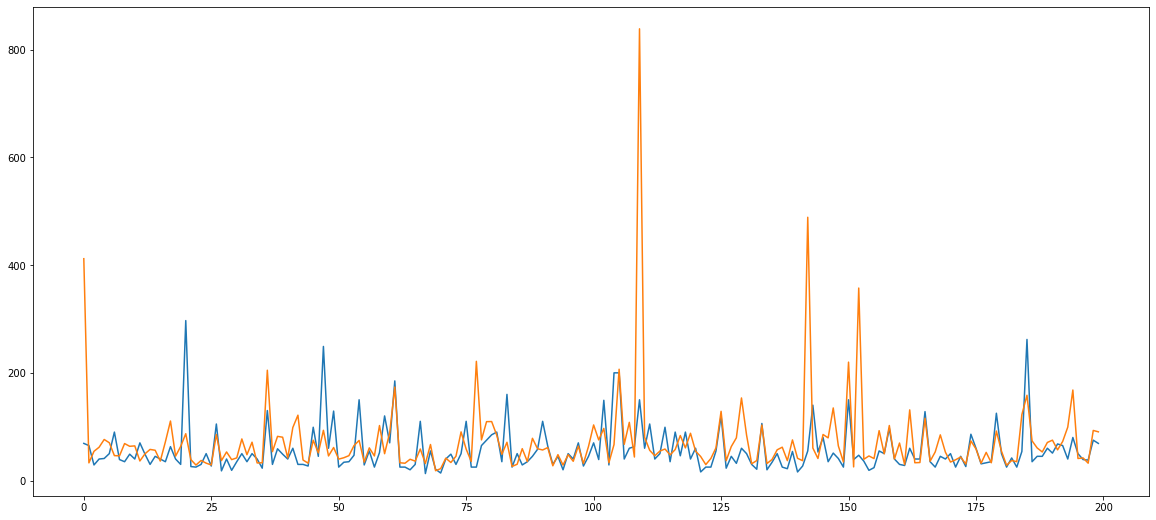

In [136]:
fig, axes = plt.subplots(1,1, figsize = (20,9))

axes.plot(np.arange(200), resulto['price'].iloc[:200], label = 'True Price')
axes.plot(np.arange(200), resulto['price_pred'].iloc[:200], label = 'True Price')

In [143]:
data[data['id'] == 21234767]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbour_group_cat,neighbour_cat
15403,21234767,Comfy and bright Bedroom in super nice rooftop...,5570611,Alec,Neukölln,Neuköllner Mitte/Zentrum,52.468986,13.437251,1,27,3,4,2018-03-01,0.31,2,0,5,80
